# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
# import dependencies
from citipy import citipy
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import requests
import json
import datetime as dt
from scipy.stats import linregress
import os 

from api_keys import weather_api_key



## Generate Cities List

In [2]:
# create lists for the latitudes and logitudes generated, and the cities returned
lat_lon = []        
cities = []


In [3]:
# Create random latitudes and logitudes to look up cities
lat = np.random.uniform(low=-90, high=90, size=1500)
lon = np.random.uniform(low=-180, high=180, size=1500)
lat_lon = zip(lat, lon)
lat_lon

In [4]:
# Create the city list
for lat_lon in lat_lon:

    # Nearest city to the generated lat_lon
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name

    # If unique, add to cities
    if city not in cities:
        cities.append(city)

# Check cities returned
# cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Create API url
url = 'http://api.openweathermap.org/data/2.5/weather?&units=metric'

In [6]:
# Counter for cities 
number = 1

# Create lists to hold data as called
city_name = []
lat = []
lon = []
temp = []
humidity = []
cloudiness = []
wind_sp = []



In [7]:
# Begin the api call
for city in cities:
    try:
        city_data = (requests.get(url + '&q=' + city +'&appid=' + weather_api_key)).json()
        city_name.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        lon.append(city_data['coord']['lon'])
        temp.append(city_data['main']['temp_max'])
        humidity.append(city_data['main']['humidity'])
        cloudiness.append(city_data['clouds']['all'])
        wind_sp.append(city_data['wind']['speed'])

        print(f'Processing record {number} of {len(cities)}. | {city}')

        number += 1


    except KeyError:
        print(f'City not found. Skipping {city}...')
        # number = number + 1


Processing record 1 of 616. | ushuaia
Processing record 2 of 616. | rafai
Processing record 3 of 616. | norman wells
Processing record 4 of 616. | bethel
Processing record 5 of 616. | maragogi
Processing record 6 of 616. | rikitea
Processing record 7 of 616. | haines junction
Processing record 8 of 616. | port blair
Processing record 9 of 616. | tanete
Processing record 10 of 616. | severo-kurilsk
Processing record 11 of 616. | vila velha
Processing record 12 of 616. | ginda
Processing record 13 of 616. | bilibino
City not found. Skipping taolanaro...
Processing record 14 of 616. | puerto ayora
Processing record 15 of 616. | butaritari
City not found. Skipping grand centre...
Processing record 16 of 616. | lere
Processing record 17 of 616. | upernavik
Processing record 18 of 616. | port alfred
Processing record 19 of 616. | atuona
Processing record 20 of 616. | pontes e lacerda
Processing record 21 of 616. | kushiro
Processing record 22 of 616. | clyde river
Processing record 23 of 616

In [8]:
#city_name

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create dataframe
city_data_df = pd.DataFrame({'City': city_name,
                                'Latitude': lat,
                                'Longitude': lon, 
                                'Temperature': temp,
                                'Humidity': humidity,
                                'Cloudiness': cloudiness, 
                                'Wind Speed': wind_sp})

#pd.DataFrame.to_csv(city_data_df, 'city_data.csv')

city_data_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Ushuaia,-54.8000,-68.3000,10.00,53,20,6.69
1,Rafai,4.9500,23.9167,21.51,94,87,0.65
2,Norman Wells,65.2820,-126.8329,6.00,49,20,3.09
3,Bethel,41.3712,-73.4140,7.78,87,1,2.06
4,Maragogi,-9.0122,-35.2225,23.52,90,36,3.49
...,...,...,...,...,...,...,...
565,Walvis Bay,-22.9575,14.5053,23.33,24,0,7.20
566,Mezen',65.8522,44.2400,8.10,89,100,3.25
567,Benghazi,32.1167,20.0667,21.22,41,0,4.43
568,Zapolyarnyy,69.4154,30.8136,6.00,56,0,2.06


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# Cities with humidity over 100%
above_100 = city_data_df[city_data_df.Humidity > 100].index
above_100

Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df = city_data_df
for x in above_100:
    clean_city_df = city_data_df.drop([x])

clean_city_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Ushuaia,-54.8000,-68.3000,10.00,53,20,6.69
1,Rafai,4.9500,23.9167,21.51,94,87,0.65
2,Norman Wells,65.2820,-126.8329,6.00,49,20,3.09
3,Bethel,41.3712,-73.4140,7.78,87,1,2.06
4,Maragogi,-9.0122,-35.2225,23.52,90,36,3.49
...,...,...,...,...,...,...,...
565,Walvis Bay,-22.9575,14.5053,23.33,24,0,7.20
566,Mezen',65.8522,44.2400,8.10,89,100,3.25
567,Benghazi,32.1167,20.0667,21.22,41,0,4.43
568,Zapolyarnyy,69.4154,30.8136,6.00,56,0,2.06


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

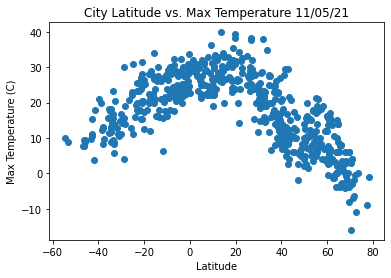

In [34]:
# Call the cate
date = dt.datetime.today().strftime('%d/%m/%y')

# Plot temperature
plt.scatter(clean_city_df['Latitude'], city_data_df['Temperature'])
plt.title(f'City Latitude vs. Max Temperature {date}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.savefig('WeatherPy/lat_temp.png')

This is comparing the latitude of each city with the maximum temperature of the day on which the data was called. 
The temperature does increase closer to the equator but the highest maximums are actually above the equator at around 20 deg latitude. 

## Latitude vs. Humidity Plot

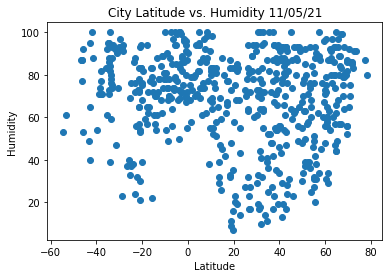

In [35]:
# Plot humidity
plt.scatter(clean_city_df['Latitude'], city_data_df['Humidity'])
plt.title(f'City Latitude vs. Humidity {date}')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('WeatherPy/lat_humidity.png')

Humidity is being plotted against latitude and the appears to be little relationship between the two. 

## Latitude vs. Cloudiness Plot

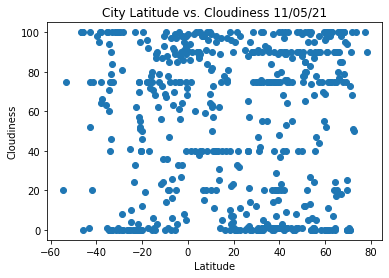

In [36]:
# Plot cloudiness
plt.scatter(clean_city_df['Latitude'], city_data_df['Cloudiness'])
plt.title(f'City Latitude vs. Cloudiness {date}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('WeatherPy/lat_cloudiness.png')

As with humidity, it is being plotted against latitude and there appears to be very little relationship between the two.

## Latitude vs. Wind Speed Plot

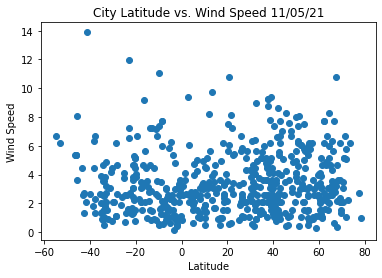

In [37]:
# Plot wind speed
plt.scatter(clean_city_df['Latitude'], city_data_df['Wind Speed'])
plt.title(f'City Latitude vs. Wind Speed {date}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('WeatherPy/lat_wind_speed.png')

Windspeed appears to be reasonably consistant regardless of distance from the equator but there are a few outliers. 

## Linear Regression

In [39]:
# Northern and Southern hemisphere dataframes
north_hem = clean_city_df.loc[clean_city_df['Latitude'] >= 0]
south_hem = clean_city_df.loc[clean_city_df['Latitude'] < 0]

#north_hem.head()
#south_hem.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8325480220309187


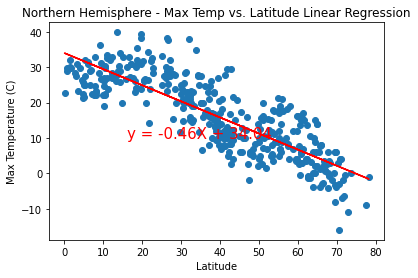

In [40]:
x_values = pd.to_numeric(north_hem['Latitude']).astype(float)
y_values = pd.to_numeric(north_hem['Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'X + ' + str(round(intercept, 2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated rvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The r-value is: {rvalue}")

plt.savefig('WeatherPy/north_hem_temp.png')

The r-value of -0.83 indicates a reasonably strong relationship between the distance from the equator in the northern hemisphere and the maximum temperature. You could be confident that a location near the equator would
be warmer than a location further away. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7275685736928417


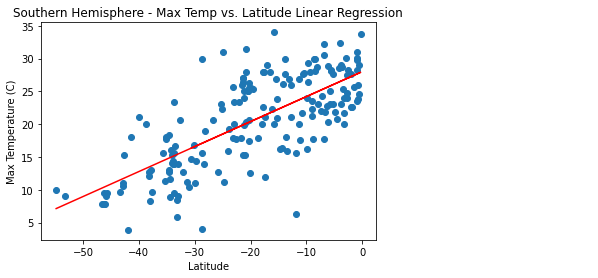

In [41]:
x_values = pd.to_numeric(south_hem['Latitude']).astype(float)
y_values = pd.to_numeric(south_hem['Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'X + ' + str(round(intercept, 2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated rvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The r-value is: {rvalue}")

plt.savefig('WeatherPy/south_hem_temp.png')

The r-value of 0.72 indiactes a relationship between the distance from the equator in the southern hemisphere, but this is less strong thsn the relationship in the northern hemisphere. You could still be reasonably confident that 
location near the equator would be warmer than a location further away and but the actual temperature would be harder to predict. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06309898385560858


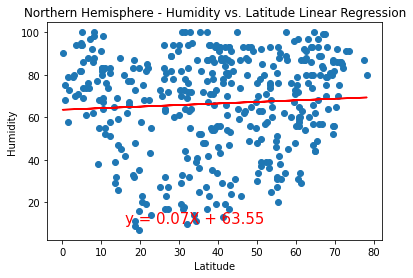

In [42]:
x_values = pd.to_numeric(north_hem['Latitude']).astype(float)
y_values = pd.to_numeric(north_hem['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'X + ' + str(round(intercept, 2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')

# Calculated rvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The r-value is: {rvalue}")

plt.savefig('WeatherPy/north_hem_humidity.png')

The r-value of 0.06 indicates no relationship between humidity and latitude. It would be very difficult to predict the level of humidity based on the latitude of a given location. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.09302801712488246


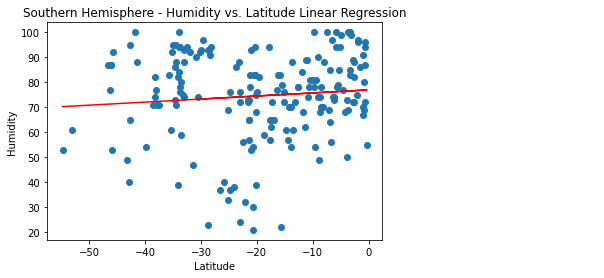

In [43]:
x_values = pd.to_numeric(south_hem['Latitude']).astype(float)
y_values = pd.to_numeric(south_hem['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'X + ' + str(round(intercept, 2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')

# Calculated rvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The r-value is: {rvalue}")

plt.savefig('WeatherPy/south_hem_humidity.png')

There is no relationship between the level of humidity and the southern latitude of a location. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03387975381327808


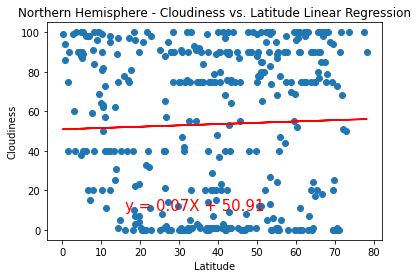

In [44]:
x_values = pd.to_numeric(north_hem['Latitude']).astype(float)
y_values = pd.to_numeric(north_hem['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'X + ' + str(round(intercept, 2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Calculated rvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The r-value is: {rvalue}")

plt.savefig('WeatherPy/north_hem_cloudiness.png')

Again, no relationship between the latitude in the northern hemisphere and the level of cloud cover. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06099343597030128


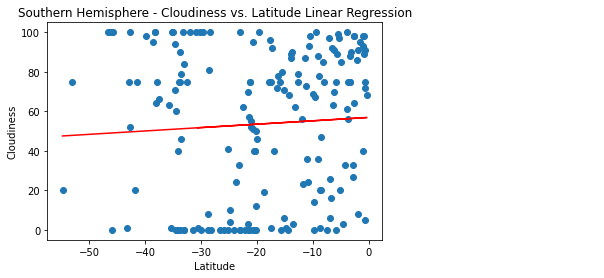

In [45]:
x_values = pd.to_numeric(south_hem['Latitude']).astype(float)
y_values = pd.to_numeric(south_hem['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'X + ' + str(round(intercept, 2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Calculated rvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The r-value is: {rvalue}")

plt.savefig('WeatherPy/south_hem_cloudiness.png')

No relationship between the level of cloudiness in the southern hemisphere and the latitude. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.07801983766506504


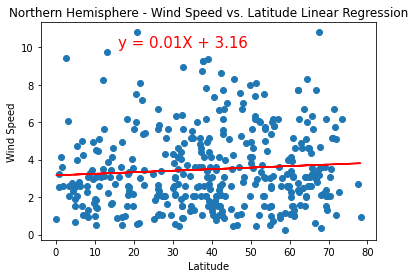

In [46]:
x_values = pd.to_numeric(north_hem['Latitude']).astype(float)
y_values = pd.to_numeric(north_hem['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'X + ' + str(round(intercept, 2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')

# Calculated rvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The r-value is: {rvalue}")

plt.savefig('WeatherPy/north_hem_wind_speed.png')

No relationship between windspeed and latitude in the nothern hemisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.20443430735772172


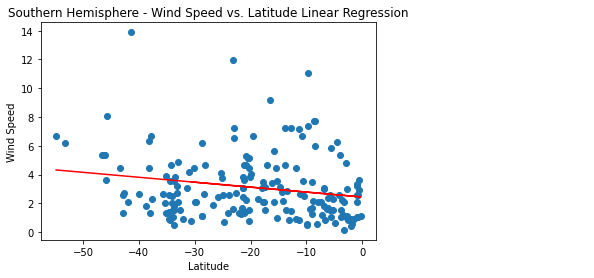

In [47]:
x_values = pd.to_numeric(south_hem['Latitude']).astype(float)
y_values = pd.to_numeric(south_hem['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'X + ' + str(round(intercept, 2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')

# Calculated rvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The r-value is: {rvalue}")

plt.savefig('WeatherPy/south_hem_wind_speed.png')

No relationship between windspeed and latitude in the southern hemisphere but it slightly more correlated than in the northern hemisphere. 